In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:20,.12f}'.format

In [2]:
bisulfate_file = '/home/bayraktar/PycharmProjects/basecalling_scripts/data/bismark_data/JR2.CX_report.txt'
header = ['Chr', 'position', 'strand', 'count_methylated', 'count_unmethylated', 'c_context', 'trinucleotide']
df = pd.read_csv(bisulfate_file, sep='\t', names=header)
df['coverage'] = df['count_methylated'] + df['count_unmethylated']
df['fraction'] = df['count_methylated'] / df['coverage']


In [3]:
df

,Chr,position,strand,count_methylated,count_unmethylated,c_context,trinucleotide,coverage,fraction
0,1,4,+,0,0,CG,CGC,0,NaN
1,1,5,-,0,0,CG,CGA,0,NaN
2,1,6,+,0,0,CHH,CTA,0,NaN
3,1,10,-,0,0,CHH,CTT,0,NaN
4,1,13,+,0,0,CHH,CAC,0,NaN
...,...,...,...,...,...,...,...,...,...
19505731,8,3360595,-,0,5,CHH,CCT,5,0.000000000000
19505732,8,3360596,-,0,5,CHH,CCC,5,0.000000000000
19505733,8,3360600,-,0,5,CHH,CTA,5,0.000000000000
19505734,8,3360601,-,0,5,CHH,CCT,5,0.000000000000


In [4]:
min_cov = (df['coverage'] >= 4)
modified = (df['coverage'] >= 4) & (df['count_methylated'] >= 3)

In [5]:
df['coverage'].describe()

count   19,505,736.000000000000
mean            32.962831189759
std             19.807347803908
min              0.000000000000
25%             21.000000000000
50%             33.000000000000
75%             44.000000000000
max          2,924.000000000000
Name: coverage, dtype: float64

In [6]:
# df['coverage'].hist()

In [7]:
df['fraction'].describe()

count   18,984,362.000000000000
mean             0.003447273024
std              0.014892129030
min              0.000000000000
25%              0.000000000000
50%              0.000000000000
75%              0.000000000000
max              1.000000000000
Name: fraction, dtype: float64

Text(0.5, 1.0, 'V. dahliae')

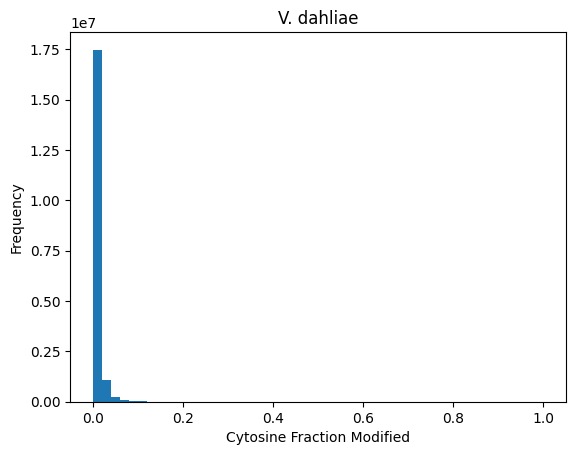

In [11]:
df['fraction'].hist(bins=50, grid=False)
plt.xlabel('Cytosine Fraction Modified')
plt.ylabel('Frequency')
plt.title('V. dahliae')

In [9]:
len(df[min_cov])

18758324

In [10]:
df[min_cov]['c_context'].value_counts()

c_context
CHH    10099428
CG      4904882
CHG     3754014
Name: count, dtype: int64

In [11]:
len(df[modified])

11860

In [12]:
df[modified]['c_context'].value_counts()

c_context
CHH    4978
CG     4843
CHG    2039
Name: count, dtype: int64